In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('details.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [7]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [9]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [10]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138886,82900.0,-0.424696,0.795505,1.111657,0.344060,0.524402,-0.160080,0.651767,0.137994,-0.261142,...,0.113014,0.245219,-0.219847,-0.515570,-0.085648,-0.336407,0.131569,0.127275,9.43,0
86037,61056.0,1.348957,-0.634708,1.022544,-0.432995,-1.461187,-0.515746,-0.901671,-0.107087,-0.409148,...,-0.245898,-0.011390,-0.002927,0.488931,0.238972,1.160827,-0.009810,0.018324,6.36,0
250512,154942.0,2.038723,-1.459877,-0.086473,-1.075964,-1.293031,0.700156,-1.801663,0.373953,0.485278,...,0.450876,1.209095,0.106716,0.113232,-0.379923,-0.108568,0.034896,-0.034024,55.00,0
269109,163532.0,-3.047835,1.312687,0.623420,-0.001500,-1.367204,-0.057938,-0.637724,1.099871,0.265086,...,0.209003,0.775814,-0.390649,0.151223,0.435205,0.776370,-1.219230,-0.826848,21.00,0
202218,134225.0,1.837395,-0.088287,-2.268945,1.007227,0.989485,-0.377806,0.775140,-0.252736,-0.360622,...,0.209571,0.376056,-0.138268,0.216634,0.455206,-0.515871,-0.062162,-0.052197,120.40,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92715.668699,0.029565,-0.001647,0.098247,0.016232,-0.044709,-0.034417,-0.073900,0.011031,-0.018073,...,0.005935,0.003029,0.005423,0.003430,0.016603,0.023401,0.018983,-0.011251,-0.002712,80.361077
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [14]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
138886   82900.0 -0.424696  0.795505  1.111657  0.344060  0.524402 -0.160080   
86037    61056.0  1.348957 -0.634708  1.022544 -0.432995 -1.461187 -0.515746   
250512  154942.0  2.038723 -1.459877 -0.086473 -1.075964 -1.293031  0.700156   
269109  163532.0 -3.047835  1.312687  0.623420 -0.001500 -1.367204 -0.057938   
202218  134225.0  1.837395 -0.088287 -2.268945  1.007227  0.989485 -0.377806   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [17]:
model = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.05, loss_function='Logloss', random_state=42)

In [18]:
model.fit(X_train, Y_train)

0:	learn: 0.6196990	total: 170ms	remaining: 1m 25s
1:	learn: 0.5509329	total: 185ms	remaining: 46s
2:	learn: 0.5011953	total: 199ms	remaining: 32.9s
3:	learn: 0.4502319	total: 214ms	remaining: 26.5s
4:	learn: 0.4117371	total: 229ms	remaining: 22.6s
5:	learn: 0.3708294	total: 243ms	remaining: 20s
6:	learn: 0.3366861	total: 255ms	remaining: 18s
7:	learn: 0.3112855	total: 269ms	remaining: 16.5s
8:	learn: 0.2890039	total: 281ms	remaining: 15.3s
9:	learn: 0.2681063	total: 294ms	remaining: 14.4s
10:	learn: 0.2490634	total: 307ms	remaining: 13.7s
11:	learn: 0.2309771	total: 320ms	remaining: 13s
12:	learn: 0.2137709	total: 333ms	remaining: 12.5s
13:	learn: 0.1996124	total: 347ms	remaining: 12s
14:	learn: 0.1884861	total: 359ms	remaining: 11.6s
15:	learn: 0.1794252	total: 372ms	remaining: 11.2s
16:	learn: 0.1706142	total: 389ms	remaining: 11.1s
17:	learn: 0.1630323	total: 404ms	remaining: 10.8s
18:	learn: 0.1565065	total: 421ms	remaining: 10.7s
19:	learn: 0.1474844	total: 438ms	remaining: 10.5s

164:	learn: 0.0120276	total: 3.15s	remaining: 6.39s
165:	learn: 0.0119252	total: 3.16s	remaining: 6.36s
166:	learn: 0.0118334	total: 3.18s	remaining: 6.34s
167:	learn: 0.0117035	total: 3.2s	remaining: 6.32s
168:	learn: 0.0116122	total: 3.21s	remaining: 6.29s
169:	learn: 0.0115402	total: 3.23s	remaining: 6.27s
170:	learn: 0.0114555	total: 3.25s	remaining: 6.25s
171:	learn: 0.0113458	total: 3.27s	remaining: 6.24s
172:	learn: 0.0112232	total: 3.29s	remaining: 6.21s
173:	learn: 0.0111145	total: 3.3s	remaining: 6.19s
174:	learn: 0.0109829	total: 3.32s	remaining: 6.17s
175:	learn: 0.0108499	total: 3.34s	remaining: 6.15s
176:	learn: 0.0108102	total: 3.35s	remaining: 6.12s
177:	learn: 0.0107535	total: 3.37s	remaining: 6.09s
178:	learn: 0.0106841	total: 3.39s	remaining: 6.07s
179:	learn: 0.0106300	total: 3.4s	remaining: 6.05s
180:	learn: 0.0105406	total: 3.42s	remaining: 6.03s
181:	learn: 0.0104718	total: 3.44s	remaining: 6.01s
182:	learn: 0.0104033	total: 3.45s	remaining: 5.98s
183:	learn: 0.0

330:	learn: 0.0044041	total: 5.91s	remaining: 3.02s
331:	learn: 0.0044007	total: 5.92s	remaining: 3s
332:	learn: 0.0043844	total: 5.94s	remaining: 2.98s
333:	learn: 0.0043743	total: 5.96s	remaining: 2.96s
334:	learn: 0.0043642	total: 5.97s	remaining: 2.94s
335:	learn: 0.0043642	total: 5.99s	remaining: 2.92s
336:	learn: 0.0043494	total: 6s	remaining: 2.9s
337:	learn: 0.0043334	total: 6.01s	remaining: 2.88s
338:	learn: 0.0043333	total: 6.03s	remaining: 2.86s
339:	learn: 0.0043249	total: 6.04s	remaining: 2.84s
340:	learn: 0.0043248	total: 6.05s	remaining: 2.82s
341:	learn: 0.0043172	total: 6.07s	remaining: 2.8s
342:	learn: 0.0043087	total: 6.08s	remaining: 2.78s
343:	learn: 0.0043087	total: 6.1s	remaining: 2.77s
344:	learn: 0.0043013	total: 6.11s	remaining: 2.75s
345:	learn: 0.0042939	total: 6.13s	remaining: 2.73s
346:	learn: 0.0042875	total: 6.14s	remaining: 2.71s
347:	learn: 0.0042567	total: 6.16s	remaining: 2.69s
348:	learn: 0.0042439	total: 6.18s	remaining: 2.67s
349:	learn: 0.0042368

492:	learn: 0.0032090	total: 8.88s	remaining: 126ms
493:	learn: 0.0032090	total: 8.89s	remaining: 108ms
494:	learn: 0.0032090	total: 8.91s	remaining: 90ms
495:	learn: 0.0032090	total: 8.93s	remaining: 72ms
496:	learn: 0.0032090	total: 8.95s	remaining: 54ms
497:	learn: 0.0032031	total: 8.97s	remaining: 36ms
498:	learn: 0.0032019	total: 8.99s	remaining: 18ms
499:	learn: 0.0031905	total: 9.01s	remaining: 0us


In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [20]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [21]:
y_pred = model.predict(X_test)
CAT_test_data_accuracy = accuracy_score(Y_test,y_pred)
CAT_precision = precision_score(Y_test, y_pred)
CAT_f1 = f1_score(Y_test, y_pred)
CAT_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


In [22]:
print("Random Forest Classifier : ")
print("Accuracy : ",CAT_test_data_accuracy)
print("Precision : ",CAT_precision)
print("F1 : ",CAT_f1)
print("Recall : ",CAT_recall)
print(f'Classification Report:\n{classification_rep}')

Random Forest Classifier : 
Accuracy :  0.9493243243243243
Precision :  0.9767441860465116
F1 :  0.9180327868852459
Recall :  0.865979381443299
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       199
           1       0.98      0.87      0.92        97

    accuracy                           0.95       296
   macro avg       0.96      0.93      0.94       296
weighted avg       0.95      0.95      0.95       296



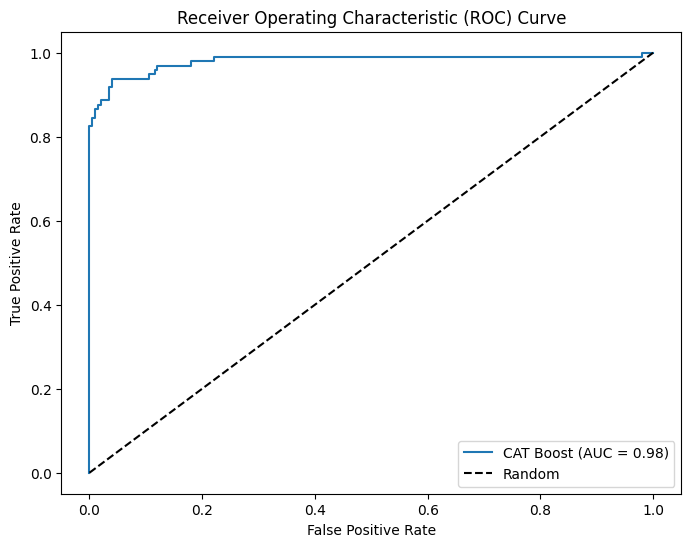

In [23]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'CAT Boost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()